Use all numerical features (area, bedrooms, bathrooms, stories, parking) to predict price.
(a)  Implement Multiple Linear Regression using OLS (Normal Equation).

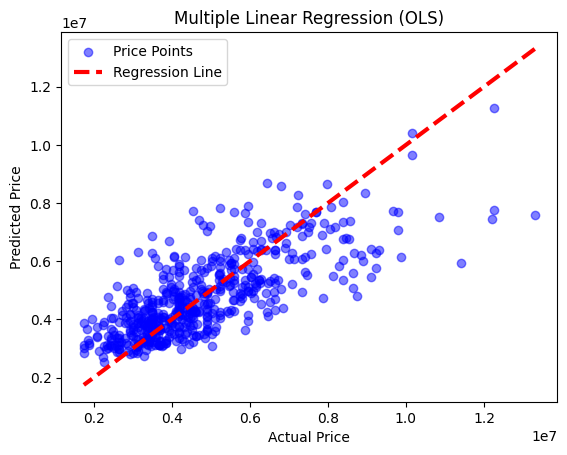

In [50]:
# multiple linear regression using OLS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv_data=pd.read_csv('Housing.csv')
# print(csv_data.head())

x=np.array(csv_data[['area','bedrooms','bathrooms','stories','parking']])
y=np.array(csv_data['price'])
# print(x)
# print(y)

# for cofficient matrix
x_transpose=np.transpose(x)
x_transpose_x=np.dot(x_transpose,x)
x_transpose_y=np.dot(x_transpose,y)
x_transpose_x_inv=np.linalg.inv(x_transpose_x)
beta_cofficient=np.dot(x_transpose_x_inv,x_transpose_y)

# predicted value
predicted_y=np.dot(x,beta_cofficient)

# plotting
plt.scatter(y, predicted_y, color='blue',alpha=0.5, label='Price Points')
plt.plot(y,y,'r--',lw=3, label='Regression Line')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.title("Multiple Linear Regression (OLS)")
plt.show()

(b) Implement Multiple Linear Regression using GD.

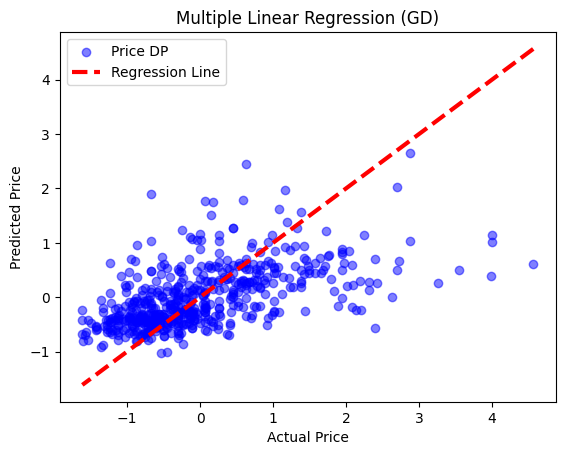

In [1]:
# multiple linear regression using GD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv_data=pd.read_csv('Housing.csv')

x = np.array(csv_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
y = np.array(csv_data['price'])
# print(x)
# print(y)

# normalize the data
x_new=(x-np.mean(x))/np.std(x)
y_new=(y-np.mean(y))/np.std(y)

# gradient descent algorithm
def gradient_descent_algorithm(x,y,learning_rate, n_iteration):

    # calculating beta cofficient matrix
    x_transpose = np.transpose(x)
    x_transpose_x = np.dot(x_transpose, x)
    x_transpose_y = np.dot(x_transpose, y)
    x_transpose_x_inv = np.linalg.inv(x_transpose_x)
    beta_cofficient = np.dot(x_transpose_x_inv, x_transpose_y)

    m=len(y)
    for _ in range(n_iteration):
        y_pred = np.dot(x, beta_cofficient)
        error=y_pred-y
        dm_gradient=(1/m)*np.dot(x_transpose,error)
        beta_cofficient-=learning_rate*dm_gradient

    return beta_cofficient

updated_beta_cofficient=gradient_descent_algorithm(x_new,y_new,0.001,1000)
# print(updated_beta_cofficient)

# prediction 
y_predicted=np.dot(x_new,updated_beta_cofficient)

# plotting
plt.scatter(y_new,y_predicted,color='blue',alpha=0.5,label='Price DP')
plt.plot(y_new,y_new,'r--',lw=3,label="Regression Line")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.title('Multiple Linear Regression (GD)')
plt.show()